<a href="https://colab.research.google.com/github/edisongomezs18/edisongomez.com/blob/main/TFM_EdisonGomez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Maestría en Sistemas de la información***
# ***Mención en inteligencia de negocios y analítica de datos masivos***
## ***Módulo: Fundamentos de tratamiento de datos para Data Science***
### ***Mestrante: Edison Javier Gómez Sangoluisa***

# Descripción del problema:

“Hola! Soy Patricio, director de Eventos Media, empresa dedicada a la gestión de eventos. Estamos probando un nuevo sistema para recepción de solicitudes de compra de tickets.Me ha llegado la información de unas entradas y tengo que procesarlas. El objetivo es estructurar los datos en una tabla, pero la información llegó con varios problemas... Me podrías ayudar a limpiar y estructurar el mensaje? Las instrucciones de cómo hacerlo están en el mismo mensaje! Me gustaría que la solución final esté en una tabla para poder procesarla luego.”

# Desarrollo de la solución:

        nombre_cliente id_cliente id_canal id_evento precio
0    Patricio Fernadez      01234      001     11111   25.6
1    Borja Mon de York      01235      001     11111   25.6
2   Patricio Fernandez      01234      001     11111   55.3
3          Bruce Wayne      01238      001     11111   75.6
4       Micheal Jordan      01236      001     11111  125.6
5   Patricio Fernandez      01234      002     11111   28.6
6   Elidolo DelEcuador      01239      001     11111   25.6
7         Peter Parker      01231      005     11112   75.2
8     Ignacio Gonzalez      01232      001     11112   25.6
9           Clark Kent      01222      001     11111   15.8
10         Bruce Wayne      01238      001     11112   35.2
11         Pepe Fulano      01222      001     11112   25.6


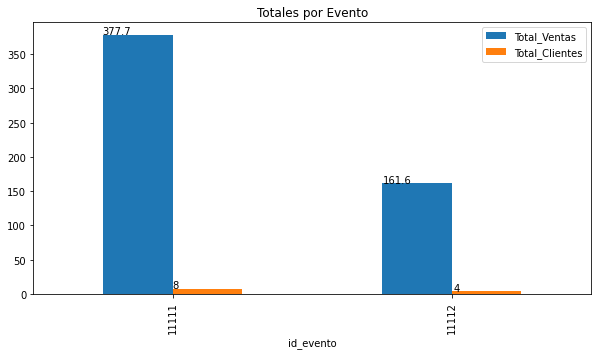

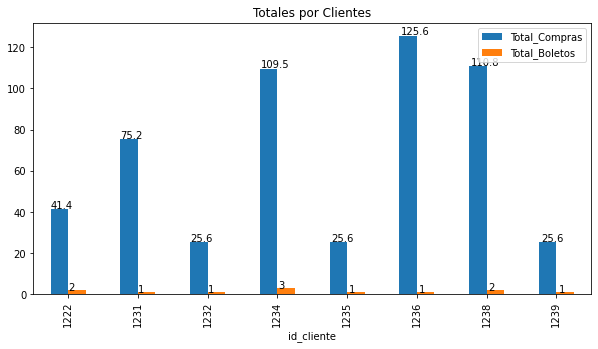

In [7]:
# Importar librerías necesarias
import nltk
import pandas as pd

#Asignación del mensaje de entrada:
def cargaMensaje():
  mensaje = """
* Esta es una línea de comentario y no sirve para nada 
* La estructura de la información relevante es: 
* primeros 5 digitos : id del cliente
* los siguientes 3 digitos: id del canal 
* los siguientes 5 digitos: id del evento
* Una cantidad variable de caracteres inútiles 
* El caracter "-" marca el inicio y final del precio de venta. 
* Necesitamos una tabla que estructure la información descrita anteriormente

Patricio Fernadez, 0123400111111jkljlkjhjkhjkhjkhjkh-25.6-ergfgfggfhgfhgfh
Borja Mon de York, 0123500111111jklfgfglkjhjkhjkhjkhjkh-25.6-rtytry
Patricio Fernandez, 0123400111111jkljassaslkjhjkhjkhjkhjkh-55.3-tyt
Bruce Wayne, 0123800111111jkljlkjhjkhjkhjkhjkh-75.6-asfdsf
Micheal Jordan, 0123600111111jkljlkjhjkhjkhjkhjkh-125.6-fdgdghrtt
Patricio Fernandez, 0123400211111jkljlkjhjkhjkhjkhjkh-28.6-ererggfdv

Elidolo DelEcuador, 0123900111111jkljlkjhjkhjkrrrhjkhjkh-25.6-dsgfdgrd
* Esto es una trampa!
Peter Parker, 0123100511112jkljlkjhjkhjkhjkhjkh-75.2-fgbfb
Ignacio Gonzalez, 0123200111112jkljlkjhjkhjkhjkhjkh-25.6-dgergetg

Clark Kent, 0122200111111jkljlkgfghfhjhjkhjkhjkhjkh-15.8-sdfgfdgdg
Bruce Wayne, 0123800111112jkljlkrrrrjhjkhjkhjkhjkh-35.2-gregregr
Pepe Fulano, 0122200111112jkljlkjhjkhjkhjkhjkh-25.6-wrgrgreg
"""
  return(mensaje)

#Crear el dataframe para almacenar los datos del mensaje
def crearDf():
  global df
  df = pd.DataFrame(columns=['nombre_cliente','id_cliente','id_canal','id_evento','precio'])
  return(df)

#Cargar los datos resultantes en el Dataframe
def llenarDf (c1,c2,c3,c4,c5):
  global df
  df = df.append({'nombre_cliente': c1,'id_cliente':c2,'id_canal':c3,'id_evento':c4,'precio':c5}, ignore_index=True)
  return(df)

#Dividir el mensaje en lineas individuales
def mensajeLineas(mensaje):
  lineas = mensaje.splitlines()
  return(lineas)

#Dividir las lineas en campos definidos
def lineaCampos (lineasValidas):
  global nombre_cliente
  global id_cliente
  global id_canal
  global id_evento
  global precio
  columna = lineasValidas.split(", ")
  nombre_cliente = columna[0]
  valores = columna[1].split("-")
  campos = valores[0]
  precio = valores[1]
  id_cliente = campos[0:5]
  id_canal = campos[5:8]
  id_evento = campos[8:13]
  return(nombre_cliente,id_cliente,id_canal,id_evento,precio)

#Procesar las lineas válidas
def procesaLineas(lineas):
  for linea in lineas:
    validador = linea[0:1]
    if validador not in ('',' ','*'):
      lineasValidas = linea
      lineaCampos (lineasValidas)
      llenarDf (nombre_cliente,id_cliente,id_canal,id_evento,precio)

#Graficar el total por eventos
def graficarEvento(df):
  df['id_evento'] = df['id_evento'].astype('int')
  df['precio'] = df['precio'].astype('float64')
  totales = df.groupby('id_evento').agg(Total_Ventas=('precio', 'sum'), Total_Clientes=('precio', 'count'))
  ax = totales.plot(kind='bar',title='Totales por Evento',figsize=(10,5))
  for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

#Graficar el total por clientes
def graficarCliente(df):
  df['id_cliente'] = df['id_cliente'].astype('int')
  df['precio'] = df['precio'].astype('float64')
  totales = df.groupby('id_cliente').agg(Total_Compras=('precio', 'sum'), Total_Boletos=('precio', 'count'))
  ax = totales.plot(kind='bar',title='Totales por Clientes',figsize=(10,5))
  for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

#Proceso principal donde se invocan a las funciones creadas
def main():
  crearDf()
  mensaje = cargaMensaje()
  lineas = mensajeLineas(mensaje)
  procesaLineas(lineas)
  print(df)
  graficarEvento(df)
  graficarCliente(df)
  
#Ejecucion del proceso principal
main()

# Conclusiones

Luego de cargar los datos en un Dataframe, se puede agrupar la venta de boletos por eventos y por clientes para obtener los siguientes resultados:

*   Existen dos eventos en total y un total de 12 boletos vendidos
*   El evento con código 11111 recaudó 377.70 con 8 boletos vendidos
*   El evento con código 11112 recaudó 161.60 con 4 boletos vendidos
*   El cliente que más compró boletos fue el cliente con códidgo 1234 con 3 boletos
*   El cliente que más gastó en boletos fue el cliente con código 1236 por un total de 125.60





